#### "The Copernicus Marine Toolbox is a free and easy-to-use tool that interoperates with the Copernicus Marine Data Store intending to cover any use case, from retrieval of metadata to a complete dataset, or just a subset, for any type of product: numerical models, satellite and/or in-situ observations. "

# Example : Argo profile vs Reanalysis
## 1. Get Argo data

In [1]:
from argopy import DataFetcher
from argopy import IndexFetcher
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import gsw
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
ds = DataFetcher().float(6990580).to_xarray()
ds = ds.argo.point2profile()
ds

<xarray.Dataset> Size: 120kB
Dimensions:          (N_PROF: 39, N_LEVELS: 243)
Coordinates:
  * N_PROF           (N_PROF) int64 312B 0 1 2 3 4 5 6 ... 32 33 34 35 36 37 38
  * N_LEVELS         (N_LEVELS) int64 2kB 0 1 2 3 4 5 ... 238 239 240 241 242
    LATITUDE         (N_PROF) float64 312B 52.1 52.17 52.2 ... 55.92 55.49 54.95
    LONGITUDE        (N_PROF) float64 312B -18.77 -18.58 ... -11.45 -10.94
    TIME             (N_PROF) datetime64[ns] 312B 2023-07-09T08:44:38 ... 202...
Data variables: (12/15)
    CYCLE_NUMBER     (N_PROF) int64 312B 1 1 2 3 4 5 6 ... 32 33 34 35 36 37 38
    DATA_MODE        (N_PROF) <U1 156B 'R' 'R' 'R' 'R' 'R' ... 'R' 'R' 'R' 'R'
    DIRECTION        (N_PROF) <U1 156B 'D' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_PROF) int64 312B 6990580 6990580 ... 6990580 6990580
    POSITION_QC      (N_PROF) int64 312B 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    PRES             (N_PROF, N_LEVELS) float32 38kB 1.48 2.47 ... 1.968e+03 nan
    ...               ...
    PSAL_ERROR       (N_PROF) float32 156B nan nan nan nan ... nan nan nan nan
    PSAL_QC          (N_PROF) int64 312B 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    TEMP             (N_PROF, N_LEVELS) float32 38kB 15.47 15.48 ... 3.69 nan
    TEMP_ERROR       (N_PROF) float32 156B nan nan nan nan ... nan nan nan nan
    TEMP_QC          (N_PROF) int64 312B 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    TIME_QC          (N_PROF) int64 312B 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://erddap.ifremer.fr/erddap
    Fetched_by:           kbalem
    Fetched_date:         2024/04/25
    Fetched_constraints:  WMO6990580
    Fetched_uri:          ['https://erddap.ifremer.fr/erddap/tabledap/ArgoFlo...
    history:              Variables filtered according to DATA_MODE; Variable...

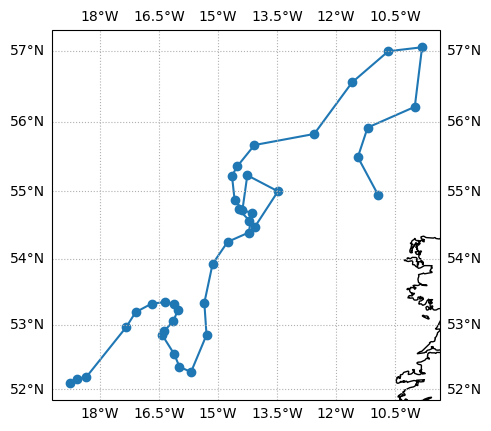

In [3]:
f = plt.figure()
ax = f.add_subplot(projection=ccrs.Mercator())
ax.plot(ds['LONGITUDE'],ds['LATITUDE'],'-o',transform=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(linestyle=':',draw_labels=True)

Text(0.5, 0.98, '2023-08-03T01:55:44.000000000')

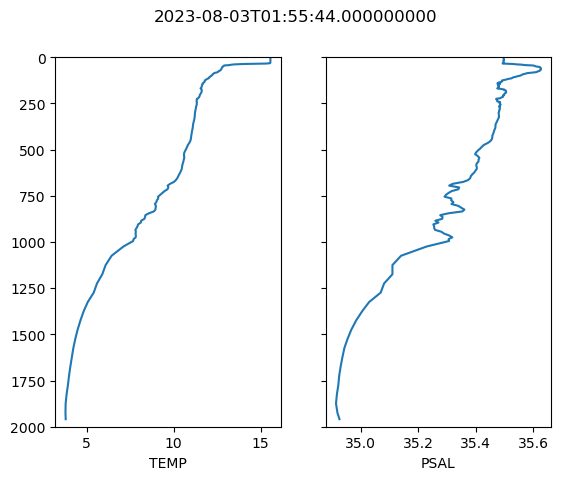

In [4]:
dp = ds.isel(N_PROF=10)
f,ax = plt.subplots(1,2,sharey=True)
ax[0].plot(dp['TEMP'],dp['PRES']),
ax[0].set_xlabel('TEMP')
ax[1].plot(dp['PSAL'],dp['PRES'])
ax[1].set_xlabel('PSAL')
ax[1].set_ylim(2000,0)
f.suptitle(dp['TIME'].values)

## 2. Get ISAS-NRT from CMEMS

In [5]:
import copernicusmarine as cm

/opt/anaconda3/envs/cmto2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
cm.login(skip_if_user_logged_in=True)

INFO - 2024-04-25T13:56:12Z - You are already logged in. Skipping login.


True

https://data.marine.copernicus.eu/product/INSITU_GLO_PHY_TS_OA_NRT_013_002/services

In [7]:
dg = cm.open_dataset(
      dataset_id="cmems_obs-ins_glo_phy-temp-sal_nrt_oa_P1M",
      dataset_version="202211",
      variables=["PSAL", "TEMP"],
      minimum_longitude=dp['LONGITUDE'].values,
      maximum_longitude=dp['LONGITUDE'].values,
      minimum_latitude=dp['LATITUDE'].values,
      maximum_latitude=dp['LATITUDE'].values,
      start_datetime=str(dp['TIME'].values)[:19],
      end_datetime=str(dp['TIME'].values)[:19],
      minimum_depth=0,
      maximum_depth=2000,
)
dg

INFO - 2024-04-25T13:57:36Z - You forced selection of dataset version "202211"
INFO - 2024-04-25T13:57:36Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-04-25T13:57:38Z - Service was not specified, the default one was selected: "arco-geo-series"


<xarray.Dataset> Size: 2kB
Dimensions:    (depth: 152, latitude: 1, longitude: 1, time: 1)
Coordinates:
  * depth      (depth) float32 608B 1.0 3.0 5.0 10.0 ... 1.96e+03 1.98e+03 2e+03
  * latitude   (latitude) float64 8B 52.9
  * longitude  (longitude) float64 8B -16.5
  * time       (time) datetime64[ns] 8B 2023-08-01
Data variables:
    PSAL       (time, depth, latitude, longitude) float32 608B ...
    TEMP       (time, depth, latitude, longitude) float32 608B ...
Attributes: (12/21)
    Conventions:            CF-1.6
    analysis_name:          OA_NRTOAGL01
    comment:                V8.0 reference climatology and analysis parameters
    creation_date:          20240108T111657
    data_manager:           Thierry.Carval@ifremer.fr
    easternmost_longitude:  179.5
    ...                     ...
    source:                 ISAS-V8
    southernmost_latitude:  -77.0105
    start_date:             2023-12-15
    stop_date:              2023-12-15
    title:                  Global Ocean - Coriolis Analysis - Near Real Time
    westernmost_longitude:  -180

Text(0.5, 0.98, '2023-08-03T01:55:44.000000000')

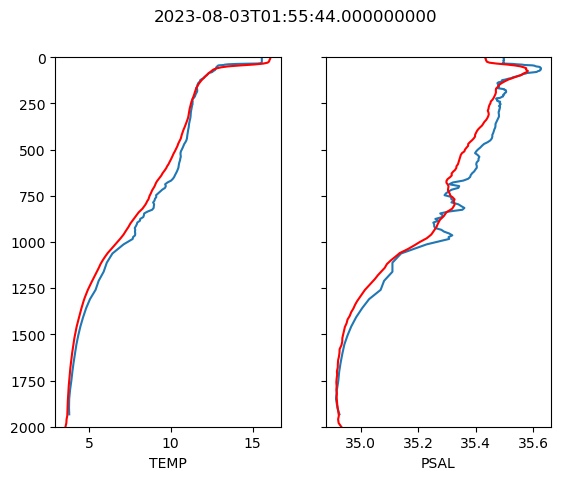

In [8]:
dpg = dg.squeeze()
f,ax = plt.subplots(1,2,sharey=True)
ax[0].plot(dp['TEMP'],-1*gsw.z_from_p(dp['PRES'],dp['LATITUDE']))
ax[0].plot(dpg['TEMP'],dpg['depth'],'r')
ax[0].set_xlabel('TEMP')
ax[1].plot(dp['PSAL'],-1*gsw.z_from_p(dp['PRES'],dp['LATITUDE']))
ax[1].plot(dpg['PSAL'],dpg['depth'],'r')
ax[1].set_xlabel('PSAL')
ax[1].set_ylim(2000,0)
f.suptitle(dp['TIME'].values)

## Main functionalities (https://help.marine.copernicus.eu/en/collections/9054839-main-functionalities)
- Copernicus Marine Toolbox CLI - Explore the catalogue and metadata
- Copernicus Marine Toolbox CLI - Subset
- Copernicus Marine Toolbox CLI - Get original files
- Copernicus Marine Toolbox API - Explore the catalogue and metadata
- Copernicus Marine Toolbox API - Subset
- Copernicus Marine Toolbox API - Get original files
- Copernicus Marine Toolbox API - Open a dataset or read a dataframe remotely